# Using SQL with Pandas - Lab

## Introduction

In this lab, we'll learn the various ways to query a dataset and get information using pandas.

## Objectives

You will be able to:

* Query DataFrames with SQL using the `pandasql` library
* Query DataFrames by slicing with conditional logic
* Use the query method to access data

## The Dataset

In this lab, we'll continue working with the _Titanic Survivors_ Dataset

Begin by importing `pandas` as `pd`, `numpy` as `np`, and `matplotlib.pyplot` as `plt`, and set the appropriate alias for each. Also set `%matplotlib inline`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Next, read in the data from `titanic.csv` and store it as a DataFrame in `df`. Display the `.head()` to ensure that everything loaded correctly.

In [5]:
df = pd.read_csv('titanic.csv',index_col=0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Slicing DataFrames Using Conditional Logic

One of the most common ways to query data with pandas is to simply slice the DataFrame so that the object returned contains only the data you're interested in.  

In the cell below, slice the DataFrame so that it only contains passengers with 2nd or 3rd class tickets (denoted by the `Pclass` column). 

**_Hint_**: Remember, your conditional logic must be passed in to the slicing operator to return a slice of the DataFrame--otherwise, it will just return a table of boolean values based on the conditional statement!

In [8]:

no_first_class_df = df[df.Pclass.isin(['2','3'])]
no_first_class_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


We can also chain conditional statements together by wrapping them in parenthesis and making us of the `&` and `|` operators ('and' and 'or' operators, respectively).

In the cell below, slice the DataFrame so that it only contains passengers with a `Fare` value between 50 and 100, inclusive.  

Text(0.5,1,'Distribution of Fares')

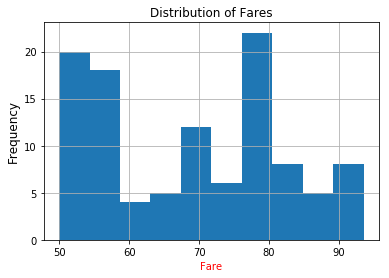

In [10]:
fares_50_to_100_df = df[(df['Fare']>=50) & (df['Fare']<=100)]
fares_50_to_100_df.head()
fares_50_to_100_df.Fare.hist()
plt.xlabel('Fare', color='red')
plt.ylabel('Frequency', fontsize=12) #Fairly self explanatory; adds a label to the y axis of the graph
plt.title('Distribution of Fares')

Remember that there are two syntactically correct ways to access a column in a DataFrame.  For instance, `df['Name']` and `df.Name` return the same thing.  

In the cell below, use the dot notation syntax and slice a DataFrame that contains male passengers that survived that also belong to Pclass 2 or 3.

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
poor_male_survivors_df = df[(df.Pclass.isin(['2', '3']))
                           & (df.Sex == 'male')]
poor_male_survivors_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S


Great! Now that we've explored the methods for slicing a DataFrame for querying our data, let's explore a sample use case.  


## Practical Example: Slicing DataFrames

We have a sneaking suspicion that women and children survived more than men, and that rich passengers were more likely to survive than poor passengers.  The easiest way to confirm this is to slice the data into DataFrames that contain each subgroup, and then quickly visualize the survival rate of each subgroup with histograms--so that's exactly what we're going to do in the cells below!

In the cell below, create a DataFrame that contains passengers that are female, as well as children (males included) under the age of 15 (exclusive).   

Also create a DataFrame that contains only male passengers of all ages.  

In [21]:
women_and_children_df = df[(df.Sex == 'female') |(df.Age < 15)]
male_all_ages_df = df[df.Sex == 'male']


Great! Now, we'll use the `matplotlib` functionality built into the DataFrame objects to quickly create visualizations of the `Survived` column for each DataFrame.  

In the cell below, create histogram visualizations of the `Survived` column for both DataFrames.  Bonus points if you use `plt.title()` to label them correctly and make it easy to tell them apart!

Text(0,0.5,'Count')

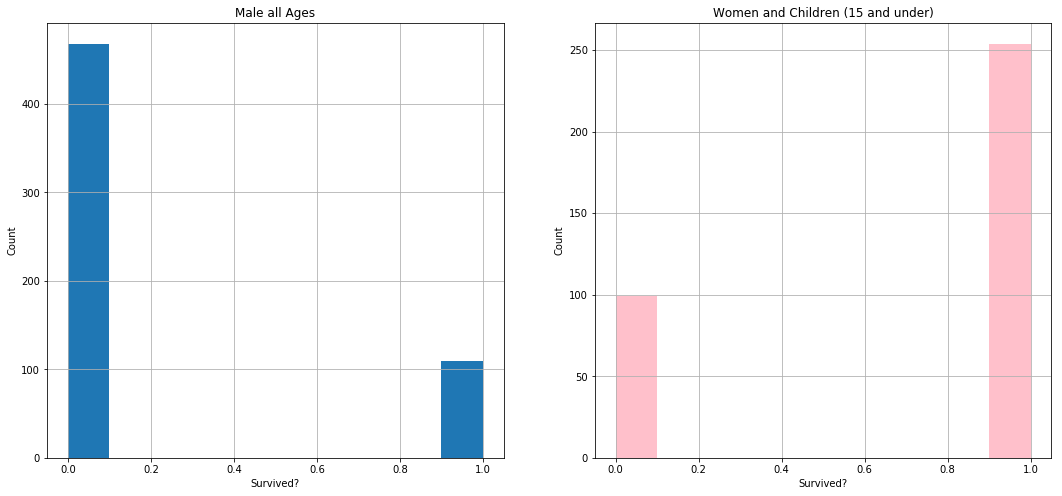

In [26]:

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 8)) #Two figures side by side
ax_lft = axes[0]
male_all_ages_df.Survived.hist(ax=ax_lft)
ax_lft.set_title('Male all Ages')
ax_lft.set_xlabel('Survived?')
ax_lft.set_ylabel('Count')

ax_rght = axes[1]
women_and_children_df.Survived.hist(ax=ax_rght, color='pink')
ax_rght.set_title('Women and Children (15 and under)')
ax_rght.set_xlabel('Survived?')
ax_rght.set_ylabel('Count')

Well that seems like a pretty stark difference--it seems our intuition was correct!  Now, let's repeat the same process, but separating rich and poor passengers.  

In the cell below, create one DataFrame containing Fist Class passengers (`Pclass == 1`), and another DataFrame containing everyone else.

In [39]:
df.Pclass.replace('?',np.nan,inplace=True)
df.dropna(subset=['Pclass'],inplace=True)
df.Pclass=df.Pclass.astype(int)

In [40]:
first_class_df = df[df.Pclass == 1]
second_third_class_df = df[df.Pclass != 1]

Now, create histograms of the surivival for each subgroup, just as we did above.  

Text(0,0.5,'Count')

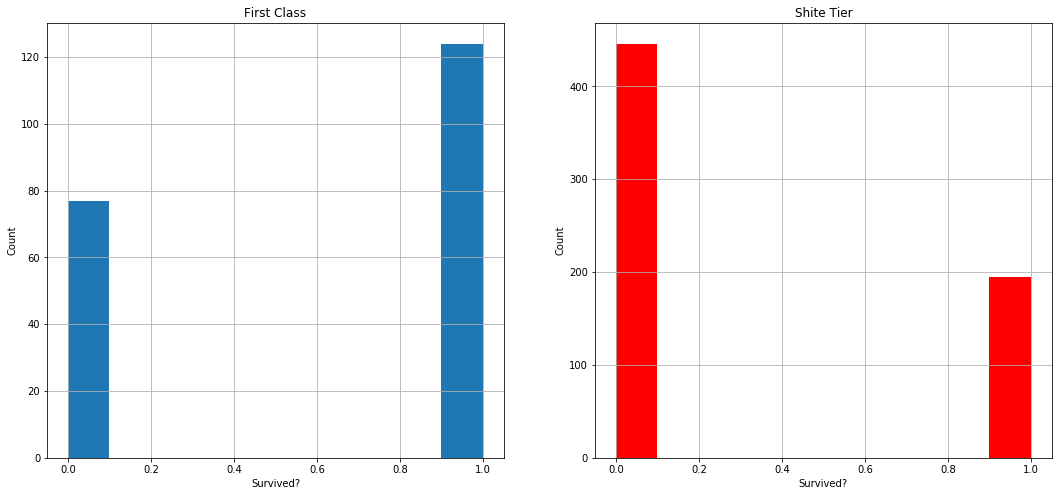

In [43]:

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 8)) #Two figures side by side
ax_lft = axes[0]
first_class_df.Survived.hist(ax=ax_lft)
ax_lft.set_title('First Class')
ax_lft.set_xlabel('Survived?')
ax_lft.set_ylabel('Count')

ax_rght = axes[1]
second_third_class_df.Survived.hist(ax=ax_rght, color='red')
ax_rght.set_title('Shite Tier')
ax_rght.set_xlabel('Survived?')
ax_rght.set_ylabel('Count')

To the surprise of absolutely no one, it seems like First Class passengers were more likely to survive than not, while 2nd and 3rd class passengers were more likely to die than not.  However, don't read too far into these graphs, as these aren't at the same scale, so they aren't fair comparisons.  

Slicing is a useful method for quickly getting DataFrames that contain only the examples we're looking for.  It's a quick, easy method that feels intuitive in Python, since we can rely on the same conditional logic that we would if we were just writing `if/else` statements.  

## Using the `.query()` method

Instead of slicing, we can also make use the DataFrame's built-in `.query()` method.  This method reads a bit cleaner, and allows us to pass in our arguments as a string.  For more information or example code on how to use this method, see the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.query.html).

In the cell below, use the `.query()` method to slice a DataFrame that contains only passengers who have a `PassengerId` greater than or equal to 500. 

In [44]:
query_string = "PassengerId>500"
high_passenger_number_df = df.query(query_string)
high_passenger_number_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
500,501,0,3,"Calic, Mr. Petar",male,17.0,0,0,315086,8.6625,NaN,S
501,502,0,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.7500,NaN,Q
502,503,0,3,"O'Sullivan, Miss. Bridget Mary",female,NaN,0,0,330909,7.6292,NaN,Q
503,504,0,3,"Laitinen, Miss. Kristina Sofia",female,37.0,0,0,4135,9.5875,NaN,S
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S


Just as with slicing, we can pass in queries with mutliple conditions.  One unique difference between using the `.query()` method and conditional slicing is that we can use `and` or `&` as well as `or` or `|` (for fun, try reading this last sentence out loud), while we are limited to the `&` and `|` symbols to denote and/or operations with conditional slicing.  

In the cell below, use the `query()` method to return a DataFrame that contains only female passengers under the age of 15 (exclusive). 

**_Hint_**: Although the entire query is a string, you'll still need to denote that `female` is also a string, within the string.  (String-Ception?)

In [47]:
female_children_df = df.query('''Sex=="Female" or Age<15''')
female_children_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q


A cousin of the `query()` method, `eval()` allows us to use the same string-filled syntax as querying for creating new columns.  For instance:

```
some_df.eval('C = A + B')
```

would return a copy of the `some_df` dataframe, but will now include a column `C` where all values are equal to the sum of the `A` and `B` values for any given row.  This method also allows the user to specify if the operation should be done in place or not, providing a quick, easy syntax for simple feature engineering.  

In the cell below, use the DataFrame's `eval()` method in place to add a column called `Age_x_Fare`, and set it equal to `Age` multiplied by `Fare`.  

In [49]:
df.eval('Age_x_Fare = Age*Fare',inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_x_Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,159.5000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2708.7654
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,206.0500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1858.5000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,281.7500


Great! Now, we'll move on the coolest part of this lab--querying DataFrames with SQL!

## Querying DataFrames With SQL

For this final section of the lab, we'll make use of the `pandasql` library.  Pandasql is a library designed to make it easy to query DataFrames directly wit SQL syntax, which was open-sourced by the company Yhat in late 2016.  It's very straightforward to use, but you are still encouraged to take a look at the [documentation](https://github.com/yhat/pandasql) as needed.  

We'll start by making sure the library is installed.  Run the cell below. 

In [50]:
!pip install pandasql

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.
Looking in indexes: https://nexus.corp.indeed.com/repository/pypi/simple
You should consider upgrading via the 'pip install --upgrade pip' command.


That should have installed everything correctly. This library has a few dependencies, which you should already have installed. If you don't, just `pip install` them in your terminal and you'll be good to go!

In the cell below, import `sqldf` from `pandasql`.

In [51]:
from pandasql import sqldf

Great! Now, let's get some practice with this handy library.

`pandasql` allows us to pass in SQL queries in the form of a string to directly query our database.  Each time we make a query, we need pass in additional parameter that gives it access to the other variables in our session/environment.  We can use a lambda function to pass `locals()` or `globals()` so that we don't have to type this every time.  

In the cell below, create a variable called `pysqldf` and set it equal to a lambda function `q` that returns `sqldf(q, globals())`.  If you're unsure of how to do this, see the example in the [documentation](https://github.com/yhat/pandasql).

In [52]:
pysqldf = lambda q: sqldf(q, globals())

Great! That will save us from having to pass `globals()` as an argument every time we query, which can get a bit tedious.  

Let's write a basic query to get a list of passenger names from `df`, limit 10.  If you would prefer to format your query on multiple lines and style it as canonical SQL, that's fine--remember that multi-line strings in python are denoted by `"""`--for example:
```
"""
This is a 
Multi-Line String
"""
```

In the cell below, write a SQL query that returns the names of the first 10 passengers.

In [54]:
q = "SELECT Name from df LIMIT 10"

passenger_names = pysqldf(q)
passenger_names

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
5,"Moran, Mr. James"
6,"McCarthy, Mr. Timothy J"
7,"Palsson, Master. Gosta Leonard"
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,"Nasser, Mrs. Nicholas (Adele Achem)"


Great! Now, let's try a harder one:

In the cell below, query the DataFrame for names and fares of any male passengers that survived, limit 30.  

In [56]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_x_Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,159.5000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2708.7654
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,206.0500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1858.5000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,281.7500


In [58]:
q2 = '''select name, fare from df where sex="male" and survived=1 limit 30'''

sql_surviving_males = pysqldf(q)
sql_surviving_males

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
5,"Moran, Mr. James"
6,"McCarthy, Mr. Timothy J"
7,"Palsson, Master. Gosta Leonard"
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,"Nasser, Mrs. Nicholas (Adele Achem)"


This library is really powerful! This makes it easy for us to leverage all of SQL knowledge to quickly query any DataFrame, especially when we only want to select certain columns.  This saves us from having to slice/query the DataFrame and then slice the columns we want (or drop the ones we don't want).

Although it's outside the scope of this lab, it's also worth noting that both `pandas` and `pandasql` provide built-in functionality for join operations, too!


## Practical Example: SQL in Pandas

In the cell below, create 2 separate DataFrames using `pandasql`.  One should contain the Pclass of all female passengers that survived, and the other should contain the Pclass of all female passengers that died.  

Then, create histogram visualizations of the `Pclass` column for each DataFrame to compare the two.  Bonus points for taking the time to make the graphs extra readable by adding titles, labeling each axis, and cleaning up the number of ticks on the X-axis! 

Text(0.5,1,'Distribution of Classes for Female Casualties')

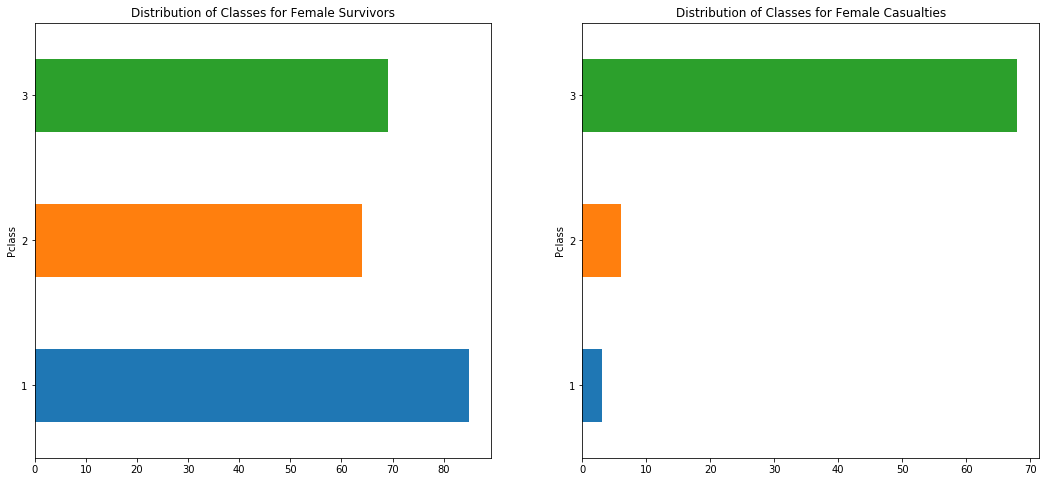

In [61]:
# Write your queries in these variables to keep your code well-formatted and readable
q3 = "SELECT Pclass, Count(*) from df where Sex = 'female' and Survived = 1 group by 1;"
q4 = "SELECT Pclass, Count(*) from df where Sex = 'female' and Survived = 0 group by 1;"

survived_females_by_pclass_df = pysqldf(q3)
died_females_by_pclass_df = pysqldf(q4)

# Create and label the histograms for each below!
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,8))

survived_females_by_pclass_df.set_index('Pclass')['Count(*)'].plot(kind='barh', ax=axes[0])
axes[0].set_title('Distribution of Classes for Female Survivors')

died_females_by_pclass_df.set_index('Pclass')['Count(*)'].plot(kind='barh', ax=axes[1])
axes[1].set_title('Distribution of Classes for Female Casualties')

## Summary

In this lab, you learned how to query Pandas DataFrames using SQL.